In [2]:
%matplotlib inline


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import os
import pandas as pd

In [5]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

data = pd.read_csv(os.path.join("datatraining.txt"))
X = data[["Temperature", "Humidity", "Light", "CO2", "HumidityRatio"]].values
y = data["Occupancy"].values

In [6]:
model = Lasso() # what does alpha default to? What happens when you change it?
model.fit(X, y)
print(list(zip(X, model.coef_.tolist())))

[(array([2.31800000e+01, 2.72720000e+01, 4.26000000e+02, 7.21250000e+02,
       4.79298818e-03]), -0.0), (array([2.31500000e+01, 2.72675000e+01, 4.29500000e+02, 7.14000000e+02,
       4.78344095e-03]), 0.0), (array([2.31500000e+01, 2.72450000e+01, 4.26000000e+02, 7.13500000e+02,
       4.77946352e-03]), 0.0016040390303715343), (array([2.31500000e+01, 2.72000000e+01, 4.26000000e+02, 7.08250000e+02,
       4.77150883e-03]), 0.0002566541934433865), (array([2.31000000e+01, 2.72000000e+01, 4.26000000e+02, 7.04500000e+02,
       4.75699293e-03]), 0.0)]


In [7]:
model = Ridge() # what does alpha default to? What happens when you change it?
model.fit(X, y)
print(list(zip(X, model.coef_.tolist())))

[(array([2.31800000e+01, 2.72720000e+01, 4.26000000e+02, 7.21250000e+02,
       4.79298818e-03]), -0.06273198200152148), (array([2.31500000e+01, 2.72675000e+01, 4.29500000e+02, 7.14000000e+02,
       4.78344095e-03]), -0.0024965287829983077), (array([2.31500000e+01, 2.72450000e+01, 4.26000000e+02, 7.13500000e+02,
       4.77946352e-03]), 0.0017625248355878779), (array([2.31500000e+01, 2.72000000e+01, 4.26000000e+02, 7.08250000e+02,
       4.77150883e-03]), 0.0003344832391035585), (array([2.31000000e+01, 2.72000000e+01, 4.26000000e+02, 7.04500000e+02,
       4.75699293e-03]), 0.004924465342955384)]


In [7]:
model = ElasticNet() # what does alpha default to? What happens when you change it?
model.fit(X, y)
print(list(zip(X, model.coef_.tolist())))

[(array([2.31800000e+01, 2.72720000e+01, 4.26000000e+02, 7.21250000e+02,
       4.79298818e-03]), -0.0), (array([2.31500000e+01, 2.72675000e+01, 4.29500000e+02, 7.14000000e+02,
       4.78344095e-03]), 0.0), (array([2.31500000e+01, 2.72450000e+01, 4.26000000e+02, 7.13500000e+02,
       4.77946352e-03]), 0.0016178824800305253), (array([2.31500000e+01, 2.72000000e+01, 4.26000000e+02, 7.08250000e+02,
       4.77150883e-03]), 0.00025601871071218393), (array([2.31000000e+01, 2.72000000e+01, 4.26000000e+02, 7.04500000e+02,
       4.75699293e-03]), -0.0)]


## Gridsearch


In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

data = pd.read_csv(os.path.join("data", "energy", "energy.csv.gz"))
X = data[['relative compactness', 'surface area', 'wall area', 'roof area',
       'overall height', 'orientation', 'glazing area',
       'glazing area distribution']].values
y = data['heating load'].values

ridge = Ridge(random_state=0)

alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
tuned_params = [{'alpha': alphas}]
n_folds = 5

grid = GridSearchCV(
    ridge, tuned_params, cv=n_folds
)


grid.fit(X, y)
print(grid.best_estimator_)

### Visual Gridsearch

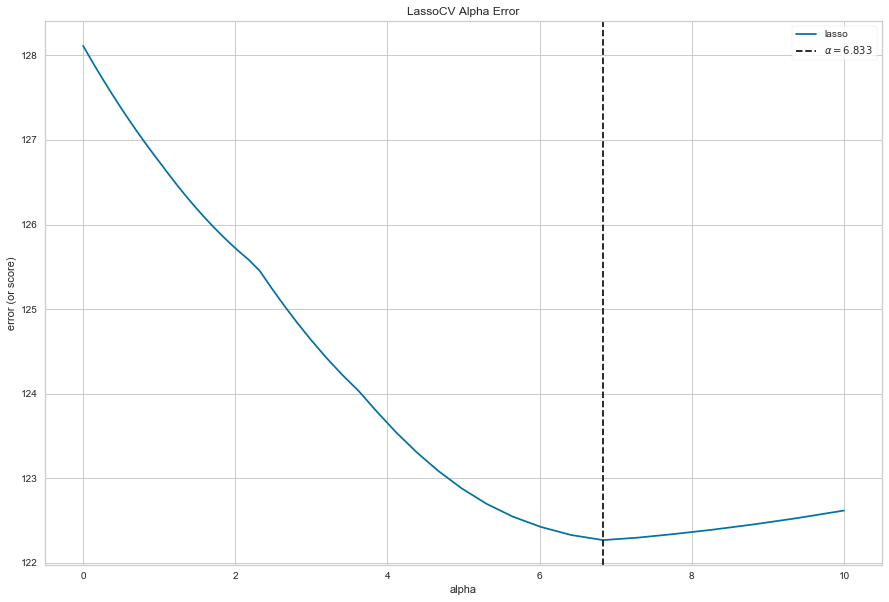

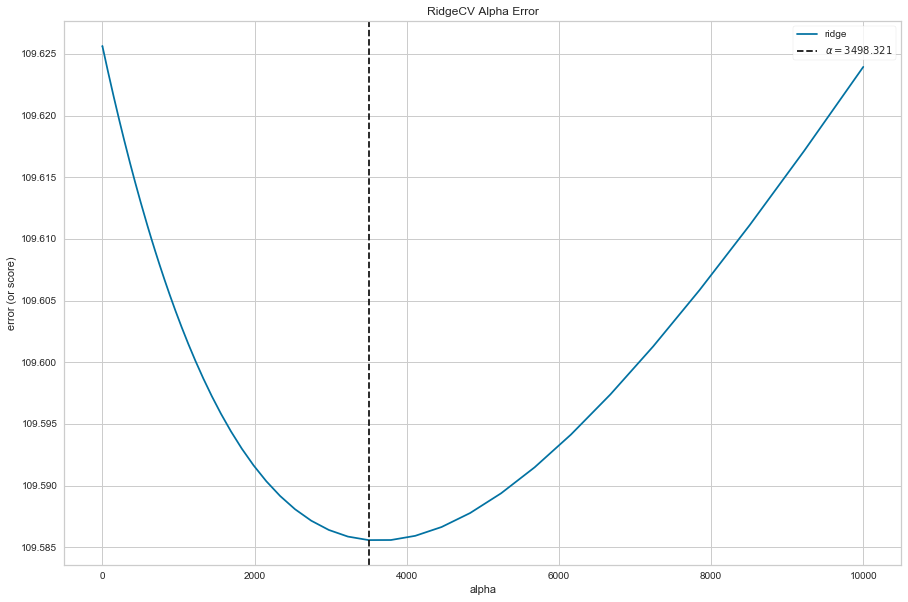

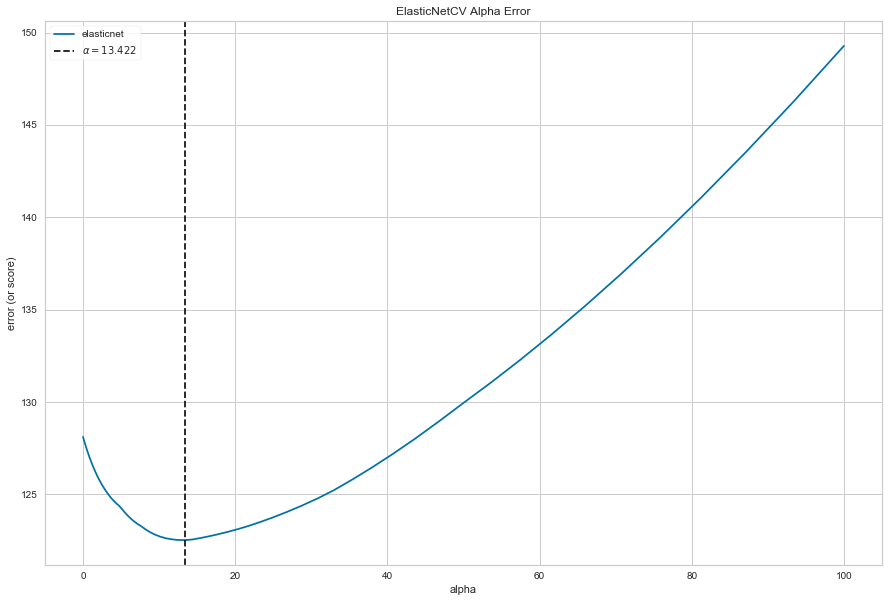

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

from yellowbrick.regressor import AlphaSelection

# Load the regression dataset
data = pd.read_excel(os.path.join("data", "concrete.xls"), header=0)

X = data[['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)']].values
y = data['Concrete compressive strength(MPa, megapascals) '].values

# Create some lists of alphas to cross-validate against
small_range = np.logspace(-10, 1, 400)
medium_range = np.logspace(-10, 2, 400)
large_range = np.logspace(-10, 4, 400)

smoothers = {
    "Lasso": LassoCV(cv=5, alphas=small_range),
    "Ridge": RidgeCV(store_cv_values=True, alphas=large_range),
    "ElasticNet": ElasticNetCV(cv=5, alphas=medium_range)
}

for _, smoother in smoothers.items():
    _, ax = plt.subplots() # Create a new figure
    visualizer = AlphaSelection(smoother, size=(1080, 720))
    visualizer.fit(X, y)
    visualizer.show()